In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from data import HFFH_ViT_Data
from loss import Loss
from model import  HFFH_ViT, HFFH_ViT_S
from trainer import Trainer
from saved import Saver

In [2]:
print(torch.cuda.get_device_name(0))

args = {}
# model
args['precision'] = "single"
args['device'] = torch.device("cuda:0")
args['image_size'] = (200, 200)
args['patch_size'] = (20, 20)
#args['dims'] = [4, 8, 16]
args['dims'] = [96, 120, 144]
#the last channel argument determines the amount of output channels. SET = 1
args['channels'] = [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1]
#args['channels'] = 16
#args['channels'] = [16, 32, 48, 48, 64, 64, 80, 80, 96, 96, 1]
args['expansion'] = 1
args['kernel_size'] = 3
args['depths'] = (2, 4, 3)
args['in_channels'] = 1

# loss function
args['loss'] = "1*L1"  # loss functions separated by '+', each loss function has [weight]*[loss_type]

# trainer
args['optimizer'] = "ADAM"
args['lr'] = 1e-4
args['weight_decay'] = 0
args['decay'] = "10-20-30-50-75-100-150-200"   # Decay milestones
args['gamma'] = 0.5     # Decay factor at each milestone
args['betas'] = (0.9, 0.999)
args['epsilon'] = 1e-8
args['print_every'] = 0 # 0 = never
args['epochs'] = 1e8
args['batch_size'] = 8

NVIDIA GeForce RTX 3090


In [103]:
d = HFFH_ViT_Data(args)
#d.create_train_dataset()
d.Load("./data/data4096_w_test.hffh")

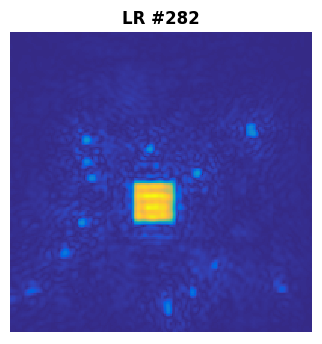

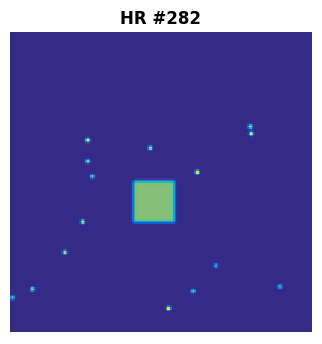

In [4]:
d.preview()

In [5]:
m = HFFH_ViT(args)
l = Loss(args)
t = Trainer(args, d, m, l)

Created HFFH_ViT Model
Preparing complex loss function...
	1.000 * L1
Making the trainer...


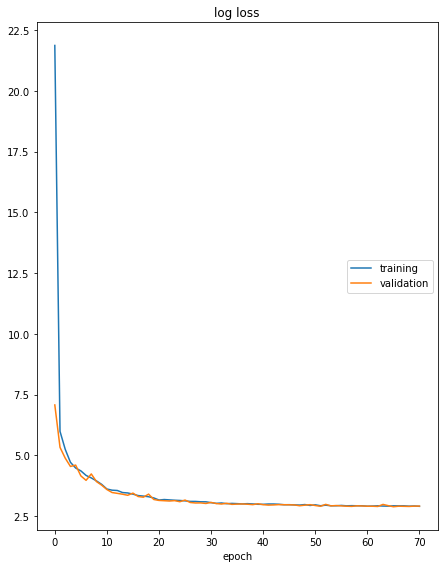

log loss
	training         	 (min:    2.899, max:   21.865, cur:    2.899)
	validation       	 (min:    2.882, max:    7.071, cur:    2.908)


KeyboardInterrupt: 

In [6]:
# train the model
while not t.terminate():
    t.train()

In [104]:
d.test_net_quant(m, args)

C:\Users\josia\AppData\Local\Temp/ipykernel_12928/165747230.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return p(torch.tensor(x).reshape((1, x.shape[0], x.shape[1]))).to(device=args['device'], dtype=torch.float)[0]
C:\Users\josia\AppData\Local\Temp/ipykernel_12928/165747230.py:149: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  MAXp = torch.tensor(y_true.max())


FFH  PSNR: 22.191
FFH  RMSE: 0.083
OURS PSNR: 34.870
OURS RMSE: 0.019
BPA  PSNR: 26.331
BPA  RMSE: 0.044
RMA  PSNR: 10.158
RMA  RMSE: 0.276


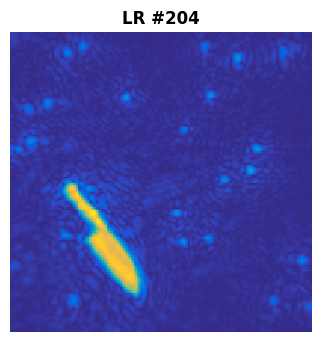

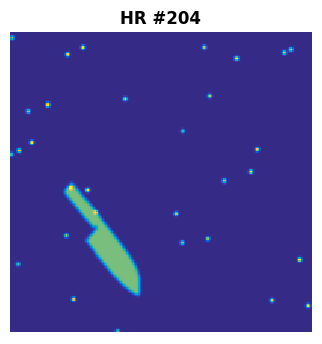

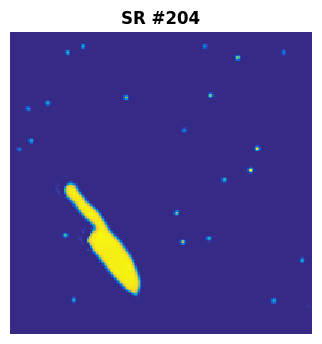

In [19]:
d.test_net(m, args)

In [ ]:
d.preview()

In [ ]:
s = Saver()
args, m, l, t = s.Load(d, HFFH_ViT, Loss, Trainer, "./saved/hffh_ViT_v2.tar")

In [ ]:
l.plot_loss("./", 350)

In [7]:
s = Saver()
s.Save(args, m, l, t, "./saved/hffh_ViT_v2.tar")

Saved model to: ./saved/hffh_ViT_v2.tar


In [ ]:
torch.cuda.empty_cache()